In [1]:
from modelTraining import run_model, load_from_file
import joblib
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from NeuralNetwork import createMLP, createMLP_variableSizes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler        # Normalizaçao
from sklearn.preprocessing import MinMaxScaler          # Normalizaçao

In [6]:
SEED = 42
num_features = 4

# --- Carregar dataset Iris ---
def load_data_set():
    data = load_iris()
    X = data.data
    y = data.target
    return X, y

def save_model(model, filename):
    joblib.dump(model, filename)
    print(f"Modelo salvo em {filename}")

def load_model(filename):
    model = joblib.load(filename)
    print(f"Modelo carregado de {filename}")
    return model

X_iris, y_iris = load_data_set()

# EX 2

## EX 2.3.1. - TVT

Score:
[3 2 0 1]


,n_features,recall,precision,f1
0,1,0.955556,0.960784,0.955357
1,2,0.977778,0.979167,0.977753
2,3,0.977778,0.979167,0.977753
3,4,0.977778,0.979167,0.977753


TOP 2 features
BEST FEATURES [3 2]


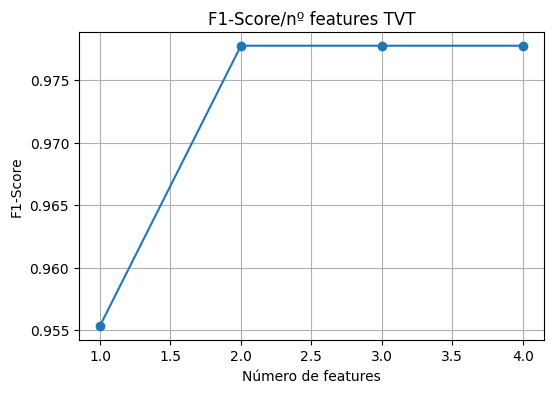

Best Parameters: {'n_neighbors': 1}

===== EX 2.3.1 TVT - KNN =====
Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]
Recall:    0.9333
Precision: 0.9345
F1-Score:  0.9333
Modelo salvo em ./models/ex2_3_1_tvt.pkl
FINAL METRICS: {'confusion_matrix': array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  2, 13]]), 'recall': 0.9333333333333332, 'precision': 0.9345238095238096, 'f1-score': 0.9332591768631814}


In [4]:
model = KNeighborsClassifier()
parameters = { 'n_neighbors': list(range(1, 16, 2)) }
filename = "./models/ex2_3_1_tvt.pkl"
metrics = run_model(X_iris, y_iris, model, "TVT", parameters, filename, label="EX 2.3.1 TVT - KNN", random_state=SEED)
print("FINAL METRICS:", metrics)

## EX 2.3.1. - CV

In [5]:
models = {
    "OneR": DummyClassifier(),     
    "kNN": KNeighborsClassifier(),                           # k=5 por defeito
    "C4.5": DecisionTreeClassifier(random_state=SEED),       # Decision Tree
    "SVM": SVC(random_state=SEED)                         # SVM com kernel RBF por omissão
    # "ANN": MLPClassifier(random_state=SEED, max_iter=1000)   # Rede Neural
}

parameters = {

    'OneR': {
        'strategy': ['most_frequent', 'stratified', 'uniform']   # <-- parâmetros adicionados
    },

    'kNN' : {
        'n_neighbors': [1, 3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },

    'C4.5' : {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    },

    'SVM' : {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    # 'ANN': {
    #     'hidden_layer_sizes': [(50,), (100,), (50,50)],
    #     'activation': ['tanh'],
    #     'alpha': [0.0001, 0.001, 0.01]
    # } estava a dar o warning: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
}

filename = "./models/ex2_3_1_cv.pkl"
metrics = run_model(X_iris, y_iris, models, "CV", parameters, filename, label="EX 2.3.1 TVT - KNN", random_state=SEED)
print("FINAL METRICS:", metrics)

Fold 0
Best Parameters: {'strategy': 'stratified'}
Best Parameters: {'n_neighbors': 1, 'weights': 'uniform', 'metric': 'euclidean'}
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'criterion': 'gini'}
Best Parameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}
Fold 1
Best Parameters: {'strategy': 'uniform'}
Best Parameters: {'n_neighbors': 1, 'weights': 'uniform', 'metric': 'euclidean'}
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'criterion': 'gini'}
Best Parameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}
Fold 2
Best Parameters: {'strategy': 'stratified'}
Best Parameters: {'n_neighbors': 1, 'weights': 'uniform', 'metric': 'euclidean'}
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'criterion': 'gini'}
Best Parameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}
Fold 3
Best Parameters: {'strategy': 'uniform'}
Best Parameters: {'n_neighbors': 1, 'weights': 'uniform', 'metric': 'euclidean'}
Best Parameters: {'max_depth': Non

,Mean_F1,Std_F1
OneR,0.334069,0.109047
kNN,0.944704,0.059554
C4.5,0.952086,0.051988
SVM,0.957377,0.047925


Modelo com maior média de F1: SVM
SVC(random_state=42)
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10
Fold 11
Fold 12
Fold 13
Fold 14
Fold 15
Fold 16
Fold 17
Fold 18
Fold 19
Fold 20
Fold 21
Fold 22
Fold 23
Fold 24
Fold 25
Fold 26
Fold 27
Fold 28
Fold 29
Fold 30
Fold 31
Fold 32
Fold 33
Fold 34
Fold 35
Fold 36
Fold 37
Fold 38
Fold 39
Fold 40
Fold 41
Fold 42
Fold 43
Fold 44
Fold 45
Fold 46
Fold 47
Fold 48
Fold 49
Fold 50
Fold 51
Fold 52
Fold 53
Fold 54
Fold 55
Fold 56
Fold 57
Fold 58
Fold 59
Fold 60
Fold 61
Fold 62
Fold 63
Fold 64
Fold 65
Fold 66
Fold 67
Fold 68
Fold 69
Fold 70
Fold 71
Fold 72
Fold 73
Fold 74
Fold 75
Fold 76
Fold 77
Fold 78
Fold 79
Fold 80
Fold 81
Fold 82
Fold 83
Fold 84
Fold 85
Fold 86
Fold 87
Fold 88
Fold 89
Fold 90
Fold 91
Fold 92
Fold 93
Fold 94
Fold 95
Fold 96
Fold 97
Fold 98
Fold 99
[3, 2, 0, 1] 0.9684175084175085
Best Parameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}
Best Parameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 

# EX 3

In [7]:
data = load_from_file(filename='../A/all_features_norm.npy')

print("Tipo:", type(data))
print("Len:", len(data))

print("\nPrimeiro elemento:")
print(type(data[0]))

try:
    print("shape:", data[0].shape)
except:
    print("não tem shape (lista ou objeto irregular)")

# empilhar horizontalmente
row = np.hstack(data)

# transformar em DataFrame
df = pd.DataFrame([row])

# gerar nomes das colunas: sensorX_featureY
col_names = []
for s in range(1, 6):
    for f in range(1, 17):
        col_names.append(f"S{s}_F{f}")

df.columns = col_names

df.to_csv('activities_features.csv', index=False)

[OK] Dados carregados de '../A/all_features_norm.npy'.
Tipo: <class 'numpy.ndarray'>
Len: 5

Primeiro elemento:
<class 'numpy.ndarray'>
shape: (16,)


In [8]:
data = load_from_file(filename='../A/all_features_norm.npy')

print("Tipo:", type(data))
print("Len:", len(data))

print("\nPrimeiro elemento:")
print(type(data[0]))

try:
    print("shape:", data[0].shape)
except:
    print("não tem shape (lista ou objeto irregular)")

row = np.hstack(data)
print(data[0][0].shape)

# transformar em DataFrame
df = pd.DataFrame([row])

# gerar nomes das colunas: sensorX_featureY
col_names = []
for s in range(1, 6):
    for f in range(1, 17):
        col_names.append(f"S{s}_F{f}")

df.columns = col_names

df.to_csv('activities_features.csv', index=False)

[OK] Dados carregados de '../A/all_features_norm.npy'.
Tipo: <class 'numpy.ndarray'>
Len: 5

Primeiro elemento:
<class 'numpy.ndarray'>
shape: (16,)
(3177, 110)


In [ ]:
OneR =  DummyClassifier()

# EX 4 - MLP Existente

In [2]:
filename = 'dataset_raw_series.csv'

In [3]:
# testing
# 1. Carregar o CSV gerado
df = pd.read_csv(filename)

# 2. Separar Features (X) e Labels (y)
X = df.drop(['person_id', 'activity_id'], axis=1)
y = df['activity_id']

# 3. Dividir Treino e Teste (70% treino, 30% teste por person_id)
pessoas_unicas = df['person_id'].unique()
print(f"Pessoas encontradas: {pessoas_unicas}")
train_ids, test_ids = train_test_split(pessoas_unicas, test_size=0.3, random_state=42)
print(f"IDs para Treino: {train_ids}")
print(f"IDs para Teste: {test_ids}")

# Filtrar o DataFrame original usando os IDs sorteados
train_df = df[df['person_id'].isin(train_ids)]
test_df = df[df['person_id'].isin(test_ids)]

# TREINO
X_train = train_df.drop(['person_id', 'activity_id'], axis=1)
y_train = train_df['activity_id']

# TESTE
X_test = test_df.drop(['person_id', 'activity_id'], axis=1)
y_test = test_df['activity_id']

# Verificar shapes
print("-" * 30)
print(f"Treino shape (X_train): {X_train.shape}")
print(f"Teste shape (X_test): {X_test.shape}")
print("-" * 30)

# NORMALIZAÇÃO
scaler = MinMaxScaler()

# Aprende a média/desvio no treino e transforma o treino
X_train_scaled = scaler.fit_transform(X_train)

# Usa a média/desvio do treino para transformar o teste (NÃO faz fit aqui!)
X_test_scaled = scaler.transform(X_test)

Pessoas encontradas: [1 2 3 4 5]
IDs para Treino: [3 1 4]
IDs para Teste: [2 5]
------------------------------
Treino shape (X_train): (16300, 10)
Teste shape (X_test): (11950, 10)
------------------------------


In [4]:
# 4. Chamar função
createMLP(X_train_scaled, y_train, X_test_scaled, y_test, 
          label="Teste_Sensores",
          hidden_layers=(150),
          learning_rate=0.01,
          max_iter=1000)


===== Teste_Sensores =====
Confusion Matrix:
[[2350    0    0    0    0]
 [   0 2136    0    0  364]
 [   0   49 1897  454    0]
 [   0  599    0 1713  238]
 [  99  175    2   44 1830]]
Recall:    0.8335
Precision: 0.8415
F1-Score:  0.8326


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'confusion_matrix': array([[2350,    0,    0,    0,    0],
        [   0, 2136,    0,    0,  364],
        [   0,   49, 1897,  454,    0],
        [   0,  599,    0, 1713,  238],
        [  99,  175,    2,   44, 1830]], dtype=int64),
 'recall': 0.8335488326493389,
 'precision': 0.8415234604459382,
 'f1-score': 0.8325673963192631}

## 4.1.

In [ ]:
metrics = createMLP(X_train, y_train, X_test, y_test, label="4.1 - Fixed learning rate")
# print("Confusion Matrix:\n", metrics['confusion_matrix'])
# print("Recall:", metrics['recall'])
# print("Precision", metrics['precision'])
# print("F1-score", metrics['f1-score'])


Confusion Matrix:
 [[1387  161  202    0    0]
 [  23  316 1961    0    0]
 [   0    0 1343  120  387]
 [   0    0    0    0 2250]
 [   0    0    0    0 2500]]
Recall: 0.5311817357730402
Precision 0.503176944444057
F1-score 0.4523265645007791


Neurónios  | F1-Score  
-------------------------


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


10         | 0.6948


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


25         | 0.8062


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


50         | 0.7276


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


75         | 0.8450


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


100        | 0.8615


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


150        | 0.8326
200        | 0.8547


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


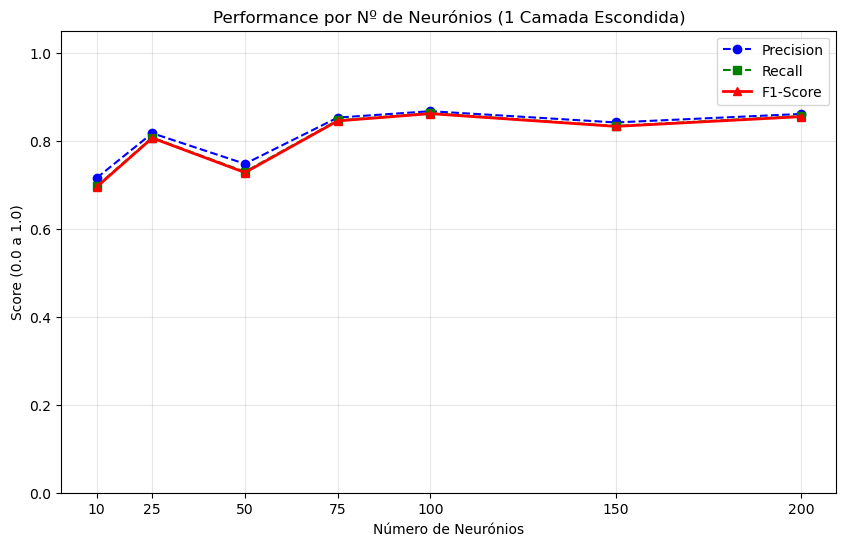

In [6]:
resultados = createMLP_variableSizes(
    X_train_scaled, y_train, X_test_scaled, y_test,
    learning_rate_type='constant',
    learning_rate=0.01,
    momentum=0.0,
)

## 4.2

invscaling - a taxa de aprendizagem diminui a cada iteraçao de acordo com uma formula

adaptive - a taxa de aprendizagem só diminui quando a validaçao nao melhora

In [ ]:
metrics = createMLP(X_train, y_train, X_test, y_test, label="4.2 - variable learning rate", learning_rate_type='adaptive')

Neurónios  | F1-Score  
-------------------------


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


10         | 0.6948


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


25         | 0.8062


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


50         | 0.7276


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


75         | 0.8450


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


100        | 0.8615


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


150        | 0.8326
200        | 0.8547


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


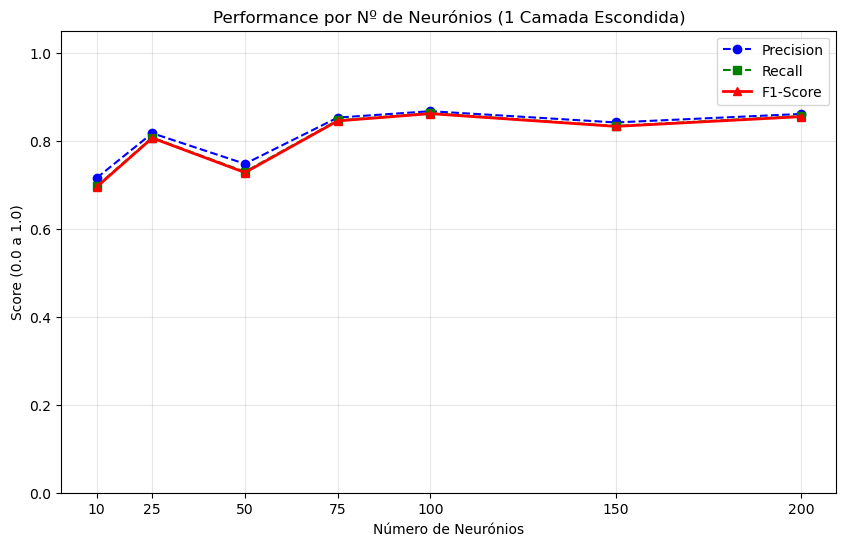

{'sizes': [10, 25, 50, 75, 100, 150, 200],
 'f1_scores': [0.6948328849418333,
  0.8062036046487051,
  0.7276435872709953,
  0.8450379658273043,
  0.8615051148942394,
  0.8325673963192631,
  0.8547061417053905],
 'precision': [0.7152981862402636,
  0.8170692322451101,
  0.7474969073912126,
  0.8525482662770656,
  0.8671077869369096,
  0.8415234604459382,
  0.8608528026100719],
 'recall': [0.6964797127222984,
  0.8072810259917921,
  0.7295578020975831,
  0.8462156452348382,
  0.8623951071591428,
  0.8335488326493389,
  0.8559504696762426]}

In [7]:
createMLP_variableSizes(
    X_train_scaled, y_train, X_test_scaled, y_test,
    learning_rate_type='adaptive',  
    learning_rate=0.01, # Valor inicial
    momentum=0.0,
)

## 4.3

In [ ]:
metrics = createMLP(X_train, y_train, X_test, y_test, label="4.2 - variable learning rate", learning_rate_type='adaptive', momentum=0.9)

Neurónios  | F1-Score  
-------------------------
10         | 0.7142
25         | 0.8626


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


50         | 0.9258
75         | 0.9134
100        | 0.9334
150        | 0.9403
200        | 0.9391


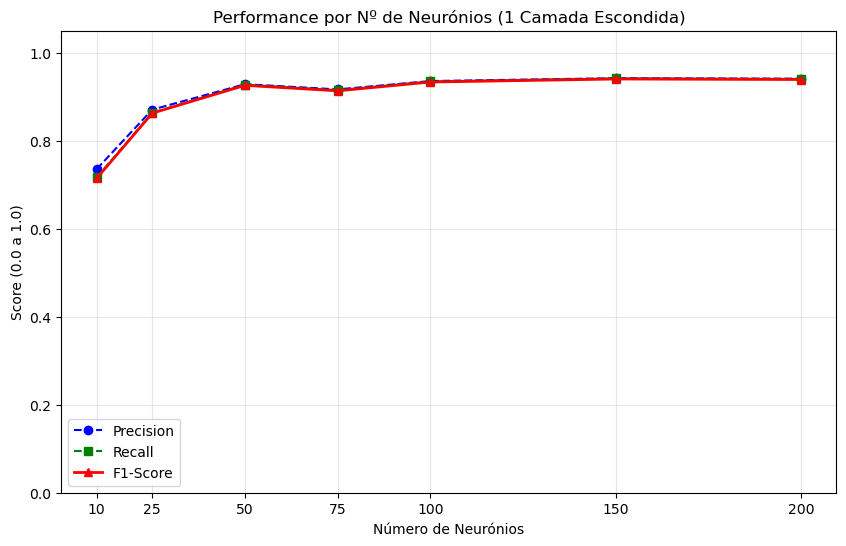

{'sizes': [10, 25, 50, 75, 100, 150, 200],
 'f1_scores': [0.7142350625627312,
  0.8626255601830823,
  0.9258464083979929,
  0.9134069083395197,
  0.9333726088525884,
  0.9402846898295344,
  0.9390913931259284],
 'precision': [0.7354341836587738,
  0.8706174562006932,
  0.9284318627612226,
  0.9166612063048099,
  0.9356431227908658,
  0.9421424991703148,
  0.9410447813408528],
 'recall': [0.7165464067487459,
  0.8635230916552669,
  0.9273563246694027,
  0.9149092202462381,
  0.9346771637026905,
  0.9416682170542636,
  0.9404234290925672]}

In [8]:
createMLP_variableSizes(
    X_train_scaled, y_train, X_test_scaled, y_test,
    learning_rate_type='adaptive',
    learning_rate=0.01,
    momentum=0.9,  # Valor típico de momentum (0.9)
)

# EX 5

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
data = 
labels = 